<a href="https://colab.research.google.com/github/lokeshpatil557/deeplearning/blob/master/MLPClassififerEx.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [ ]:
dataset =load_iris()


In [ ]:
df_flower=pd.DataFrame(dataset['data'],columns=dataset['feature_names'])
df_flower.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
df_flower['flower_label']=dataset['target']
df_flower.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower_label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
df_flower['flower_name']=df_flower['flower_label'].replace(to_replace=[0,1,2],value=dataset['target_names'])

In [ ]:
df_flower.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower_label,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [ ]:
df_flower.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower_label,flower_name
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica
149,5.9,3.0,5.1,1.8,2,virginica


In [ ]:
from sklearn.model_selection import train_test_split
X=df_flower.iloc[:,0:4]
Y=df_flower.iloc[:,4:5]
xtrain,xtest,ytrain ,ytest  = train_test_split(X,Y,test_size=0.30,random_state=1)

In [ ]:
xtest.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
14,5.8,4.0,1.2,0.2
98,5.1,2.5,3.0,1.1
75,6.6,3.0,4.4,1.4
16,5.4,3.9,1.3,0.4
131,7.9,3.8,6.4,2.0


In [ ]:
print(f'xtrain shape {xtrain.shape} ')
print(f'ytrain shape {ytrain.shape} ')
print(f'xtest shape {xtest.shape} ')

xtrain shape (105, 4) 
ytrain shape (105, 1) 
xtest shape (45, 4) 


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler=MinMaxScaler()
xtrain_transform=scaler.fit_transform(xtrain)
xtest_tansform=scaler.fit_transform(xtest)
xtrain_transform[0:10]

array([[1.        , 0.25      , 1.        , 0.91666667],
       [0.41176471, 0.75      , 0.11864407, 0.08333333],
       [0.20588235, 0.66666667, 0.06779661, 0.04166667],
       [0.14705882, 0.41666667, 0.06779661, 0.08333333],
       [0.26470588, 0.29166667, 0.49152542, 0.54166667],
       [0.23529412, 0.58333333, 0.08474576, 0.04166667],
       [0.35294118, 0.625     , 0.05084746, 0.04166667],
       [1.        , 0.75      , 0.96610169, 0.875     ],
       [0.76470588, 0.45833333, 0.74576271, 0.83333333],
       [0.88235294, 0.375     , 0.89830508, 0.70833333]])

In [ ]:
xtest_tansform[0:10]

array([[0.4       , 0.9       , 0.        , 0.        ],
       [0.2       , 0.15      , 0.34615385, 0.40909091],
       [0.62857143, 0.4       , 0.61538462, 0.54545455],
       [0.28571429, 0.85      , 0.01923077, 0.09090909],
       [1.        , 0.8       , 1.        , 0.81818182],
       [0.54285714, 0.55      , 0.67307692, 0.63636364],
       [0.71428571, 0.45      , 0.75      , 0.95454545],
       [0.2       , 0.8       , 0.13461538, 0.09090909],
       [0.08571429, 0.5       , 0.07692308, 0.        ],
       [0.71428571, 0.5       , 0.86538462, 0.95454545]])

In [ ]:
from sklearn.neural_network import MLPClassifier


In [ ]:
model=MLPClassifier(hidden_layer_sizes=(150,100,45),activation='relu',max_iter=300,solver='adam')

In [ ]:
model.fit(xtrain_transform,ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(hidden_layer_sizes=(150, 100, 45), max_iter=300)

In [ ]:
ypred=model.predict(xtest_tansform)


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
accuracy =accuracy_score(ytest,ypred)
print('accuracy is',accuracy)

accuracy is 0.9777777777777777


In [ ]:
cm=confusion_matrix(ytest,ypred)
cm

array([[14,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 13]])

In [ ]:
from sklearn.metrics import classification_report
cr=classification_report(ytest,ypred)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.94      0.97        18
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



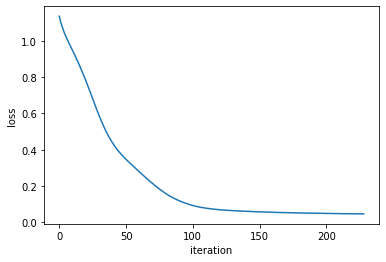

In [ ]:
plt.plot(model.loss_curve_)
plt.xlabel('iteration')
plt.ylabel('loss')
plt.show()

In [ ]:
max_iter=[100,200,250,150,300]
solver=['sgd','adam']
activation=['tanh','logistic','relu']
alpha=[0.0001,0.05,0.10]

In [ ]:
from sklearn.model_selection import GridSearchCV
param_gride={'max_iter':max_iter,'solver':solver,'activation':activation,'alpha':alpha}
gridesearch=GridSearchCV(model,param_gride,cv=5)
gridesearch.fit(xtrain,ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't conve

GridSearchCV(cv=5,
             estimator=MLPClassifier(hidden_layer_sizes=(150, 100, 45),
                                     max_iter=300),
             param_grid={'activation': ['tanh', 'logistic', 'relu'],
                         'alpha': [0.0001, 0.05, 0.1],
                         'max_iter': [100, 200, 250, 150, 300],
                         'solver': ['sgd', 'adam']})

In [ ]:
print(gridesearch.best_params_)
print(gridesearch.best_score_)

{'activation': 'tanh', 'alpha': 0.05, 'max_iter': 100, 'solver': 'adam'}
0.980952380952381
